#### What is Polynomial Regression ?

##### Polynomial Regression is an extension of Linear Regression where the relationship between the independent variable (X) and the dependent variable (y) is not linear but instead follows a polynomial function.

##### Instead of fitting a straight line (y = mx + c), we fit a curved line using polynomial terms.

##### The equation looks like this:
##### 𝑦 = 𝛽0 + 𝛽1𝑋 + 𝛽2𝑋2 + 𝛽3𝑋3 + ... + 𝛽𝑛𝑋𝑛

##### Degree (n) determines the complexity of the curve.
##### Degree 1 → Linear Regression (Straight line)
##### Degree 2 → Quadratic Regression (Parabolic curve)
##### Degree 3+ → More complex curves

#### Why Use Polynomial Regression?
##### Captures Non-Linear Relationships
##### Better Fit for Curved Data
##### More Accurate than Simple Linear Regression (for certain datasets)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Initialise Dataset
df= pd.DataFrame(sns.load_dataset("mpg"))
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
197,29.0,4,90.0,70.0,1937,14.2,76,europe,vw rabbit
309,41.5,4,98.0,76.0,2144,14.7,80,europe,vw rabbit
151,31.0,4,79.0,67.0,2000,16.0,74,europe,fiat x1.9
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel
108,20.0,4,97.0,88.0,2279,19.0,73,japan,toyota carina


In [3]:
#drop na values before splitting it
df = df[['horsepower', 'mpg']].dropna()

# Selecting feature and target
# Independent variable (Feature)
X = df[['horsepower']].values 
# Dependent variable (Target)
y = df['mpg'].values  

# Train-test splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create Polynomial Features (degree = 2 for quadratic)
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("Original Feature Shape:", X_train.shape)
print("Transformed Feature Shape:", X_train_poly.shape)

Original Feature Shape: (313, 1)
Transformed Feature Shape: (313, 3)


In [5]:
#Training data for polynomial regression
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 18.416967796018056
R² Score: 0.639170114701326


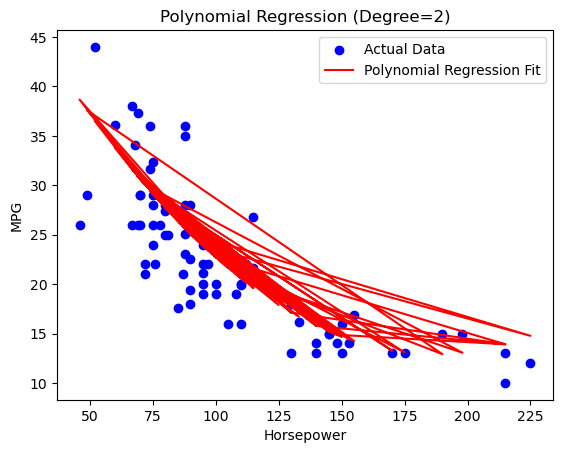

In [8]:
#plotting data without using zip to get smooth curve 
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.plot(X_test,y_pred, color='red', label="Polynomial Regression Fit")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression (Degree=2)")
plt.legend()
plt.show()

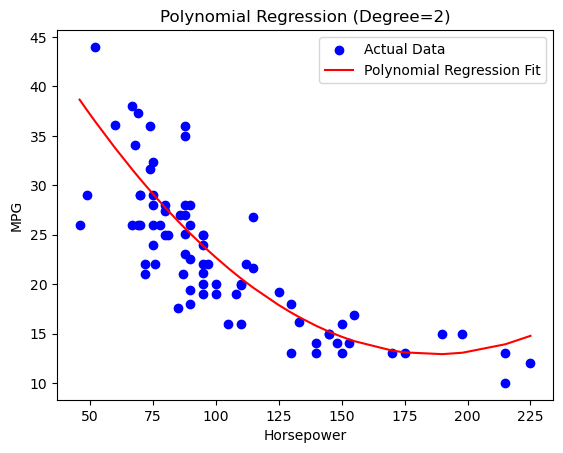

In [10]:
#plotting data without using zip to get smooth curve 
# The * (asterisk) is the "unpacking operator". It is used to unpack elements from an iterable (like a list or tuple) 
# into separate arguments when calling a function.
X_sorted, y_sorted = zip(*sorted(zip(X_test.flatten(), y_pred)))
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.plot(X_sorted,y_sorted, color='red', label="Polynomial Regression Fit")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression (Degree=2)")
plt.legend()
plt.show()